In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Chargement du fichier csv

In [2]:
df=pd.read_csv("spam.csv",encoding="ISO-8859-1")

# Exploration des données

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


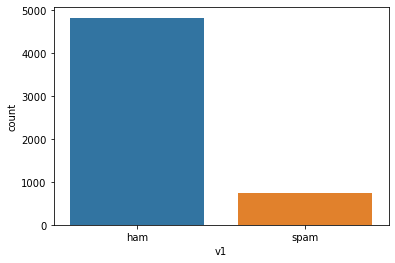

In [4]:
sns.countplot(x="v1",data=df)

In [5]:
#calculate len of each corpus
df["len"]=df["v2"].apply(lambda x: len(x))


In [6]:

average_length_spam = df[df["v1"]=="spam"]["len"].mean()

print("average length of spam : ", average_length_spam)

average length of spam :  138.8661311914324


In [7]:
average_length_ham = df[df["v1"]=="ham"]["len"].mean()

print("average length of ham : ", average_length_ham)

average length of ham :  71.02362694300518


In [8]:
#delete duplicates

df.drop_duplicates(inplace=True)

In [9]:
#check nan values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
len              0
dtype: int64

# Prétraitement

In [10]:
#drop unuseful columns
df=df[["v1","v2","len"]]

In [11]:
import re
import contractions
df["v2"]=df["v2"].apply(lambda x: x.lower())
df["v2"]=df["v2"].apply(lambda x: contractions.fix(x))
df["v2"]=df["v2"].apply(lambda x: re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)',' ', x))

In [12]:
import nltk
from nltk.corpus import stopwords

def remove_stopwords(corpus_):
    
    for mot in corpus_.split():
        if mot not in stopwords.words('english'):
            corpus_=corpus_ + mot
        else:
            corpus_=corpus_ + " "
    return corpus_



In [13]:
import nltk
nltk.download('wordnet')

def stemming(corpus):
    
    corpus_=""
    
    ps = nltk.stem.porter.PorterStemmer()
    for mot in corpus.split():
        corpus_=corpus_ + " " + ps.stem(mot) + " "
        
    return corpus_

def lemmatisation(corpus):
    corpus_=""
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    for mot in corpus.split():
        corpus_=corpus_ + " " + lem.lemmatize(mot) + " "
    return corpus_

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aBoina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
df["v2"]=df["v2"].apply(lambda x: remove_stopwords(x))
df["v2"]=df["v2"].apply(lambda x: stemming(x))
df["v2"]=df["v2"].apply(lambda x: lemmatisation(x))

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

#tokenization 

vectorizer=CountVectorizer()

X=vectorizer.fit_transform(df["v2"])
Y=df["v1"]
Y.replace("spam",1,inplace=True)
Y.replace("ham",0,inplace=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Modélisation

In [17]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

accuracy 0.9613302397525135
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1121
           1       0.99      0.72      0.83       172

    accuracy                           0.96      1293
   macro avg       0.98      0.86      0.90      1293
weighted avg       0.96      0.96      0.96      1293

Confusion Matrix: 
 [[1120    1]
 [  49  123]]


In [18]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

accuracy 0.9760247486465584
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1121
           1       0.97      0.84      0.90       172

    accuracy                           0.98      1293
   macro avg       0.97      0.92      0.94      1293
weighted avg       0.98      0.98      0.98      1293

Confusion Matrix: 
 [[1117    4]
 [  27  145]]


In [19]:
from sklearn.naive_bayes import MultinomialNB
MB=MultinomialNB()
MB.fit(X_train,y_train)
y_pred=MB.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

accuracy 0.9806651198762568
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1121
           1       0.93      0.92      0.93       172

    accuracy                           0.98      1293
   macro avg       0.96      0.95      0.96      1293
weighted avg       0.98      0.98      0.98      1293

Confusion Matrix: 
 [[1110   11]
 [  14  158]]


In [20]:
from sklearn.ensemble import StackingClassifier

#test emsemble methode in order to improve performance by combining differents algorithms

estimators = [("MB",MB),("RF",RF),("LR",lg)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

accuracy 0.9868522815158546
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1121
           1       0.99      0.91      0.95       172

    accuracy                           0.99      1293
   macro avg       0.99      0.96      0.97      1293
weighted avg       0.99      0.99      0.99      1293

Confusion Matrix: 
 [[1119    2]
 [  15  157]]


In [22]:
#check consistency of our final model 
from sklearn.model_selection import cross_val_score
scores= cross_val_score(clf,X,Y,cv=5)

In [23]:
scores

array([0.98839458, 0.98742747, 0.98549323, 0.98259188, 0.98644724])